In [7]:
files = {}
for size in range(1, 5):
    with open("../result/resultRustAlloc_{}.txt".format(size), "r") as f:
        files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dfs = {}
for k in files.keys():
    df = pd.DataFrame(files[k])
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    for col in ["size", 'inittime', 'addtime', 'totaltime']:
        df[col] = df[col].map(lambda x: int(x))
    df['initialization'] = df['initialization'].map(lambda x: True if x == "true" else False)
    dfs[k] = df

In [10]:
df = dfs['size1']
for s in range(2, 5):
    df = pd.concat([df, dfs["size{}".format(s)]])

In [11]:
withoutInit = df[df["initialization"] != True].groupby('size').mean()
withInit = df[df["initialization"] == True].groupby('size').mean()

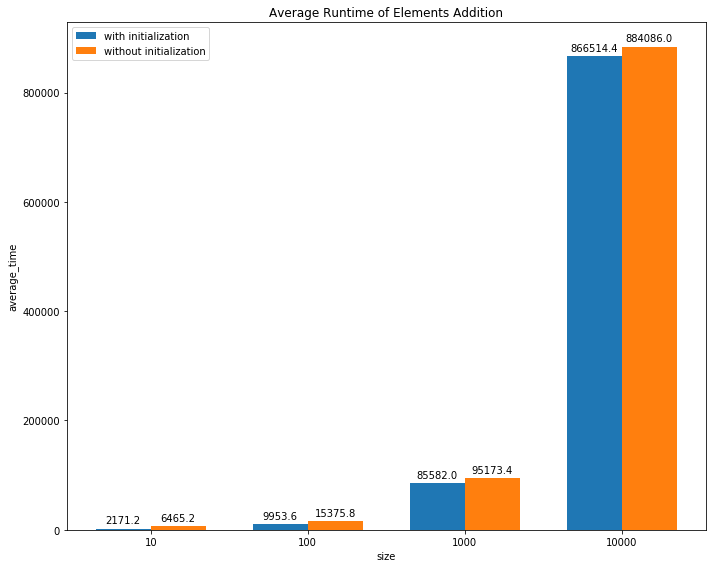

In [12]:
average_withInit = withInit.addtime
average_withoutInit = withoutInit.addtime
labels = np.array(withInit.index)
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots(figsize = (10, 8))
rects1 = ax.bar(x - width/2, average_withInit, width, label='with initialization')
rects2 = ax.bar(x + width/2, average_withoutInit, width, label='without initialization')
ax.set_title("Average Runtime of Elements Addition")
ax.set_xlabel("size")
ax.set_ylabel("average_time")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
#fig.savefig("rust_vector_manual.eps")
plt.show()